# 復習 (混合ガウス分布)

In [61]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from scipy.stats import multivariate_normal
from scipy.stats import multinomial

## (例)混合ガウス分布（混合数３）の生成過程

In [83]:
def generator():
    z= multinomial.rvs(1,[0.2,0.4,0.4])
    z=np.where(z==1)[0]# サイコロを振る
    # サイコロの目に対応するガウス分布からサンプルを得る
    if z==0:
        x = multivariate_normal.rvs([1,2],[[0.5,0],[0,0.5]])
    if z==1:
        x = multivariate_normal.rvs([3,0],[[1,0],[0,1]])
    if z==2:
        x = multivariate_normal.rvs([-2,1],[[1,0.5],[0.5,1]])
    return (z,x)
# こんな書き方したら笑われちゃいますが・・・。

out=generator()
print('ガウス分布の番号:',out[0],'位置:',out[1])

ガウス分布の番号: [1] 位置: [1.68965966 0.05432921]


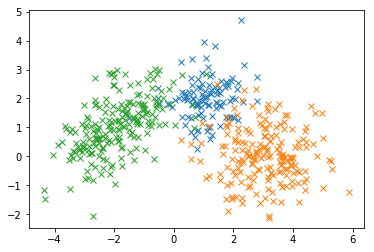

In [84]:
samples=[generator() for i in range(500)]
for index in range(3):
    plt.plot([i[1][0] for i in samples if i[0]==index],[i[1][1] for i in samples if i[0]==index],'x')
plt.show()

xだけが観測できるとき、混合ガウスから生成されると仮定、
 - $\alpha$（どのサイコロの目が出るかの確率）
 - $\mu_i$（ガウス分布の平均）
 - $\Sigma_i$(ガウス分布の分散)
 
 を推定するのがGaussian Mixture Modelingの問題設定。  
 
対数尤度 $log p(x|\Theta)$を最大化する$\Theta=[\alpha, \mu, \Sigma]$を求める (EMアルゴリズムで)。
また、副次的に$p(z_i|x_i)$(それぞれのx_iに対するz_iの事後確率)も求められる。

## 統計的機械学習のテンプレ
 - データ生成の過程、言い換えるならデータがどのように生成されるかの仮説 (線形回帰ならy=ax+bにガウシアンノイズが加わる)
 - 生成過程におけるパラメータのどれが観測され、どれが未知なのか (線形回帰ならaとbが未知)
 - 潜在パラメータの何が求めたいのか。尤もらしいパラメータか、パラメータの分布か（線形回帰なら普通は尤もらしいパラメータ）
 - どうやって解くのか (普通の回帰なら普通に解ける。lassoは勾配法。)
 
 とりあえず上２つさえ押さえておけば使える。

# Latent Dirichlet Allocation
## 何ができるのか
 - 大雑把に言うと、ドキュメントのクラスタリング
 - 『ある文章とある文章は似た分野のドキュメントだ』
 - 『このクラスタに特徴的な単語はこれだ』
 - 『この文章はこのトピックとこのトピックが混じっている』
 
みたいなことがわかる。

## 実装
 - LightLDA
 - gemsim.lda
 
## 言語処理の話
 - Bag-of-words 順序を考慮しない特徴量 (文章理解、要約系のタスクだと順序はいらないことが多い)
 - もちろん順序が重要な特徴となるタスクもある（たとえばmachine translationならLSTMなどを使ったり）